# 1. Tensor

In [2]:
import torch
import numpy as np

### 1.1 Init

In [3]:
# data -> torch
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
print(data)
print(x_data)

[[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


In [4]:
# numpy -> torch
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(np_array)
print(x_np)

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [5]:
# from other
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.6986, 0.6808],
        [0.7753, 0.1635]]) 



In [6]:
# random or constant
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.2585, 0.2173, 0.0655],
        [0.6066, 0.8577, 0.9152]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 1.2 Attribute

In [7]:
tensor = torch.rand(3, 4)

print(tensor)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

tensor([[0.3589, 0.3494, 0.2326, 0.5337],
        [0.1211, 0.5122, 0.9305, 0.7573],
        [0.1712, 0.1756, 0.3264, 0.7389]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### 1.3 Operation

In [8]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(tensor.device)

cuda:0


In [9]:
# Numpy indexing & slice
tensor = torch.ones(4, 4)
print(f'First row : {tensor[0]}')
print(f'First column : {tensor[:,0]}')
print(f'Last column : {tensor[:, -1]}')
tensor[:, 1] = 0
print(tensor)

First row : tensor([1., 1., 1., 1.])
First column : tensor([1., 1., 1., 1.])
Last column : tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [10]:
# merge
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1.shape)
print(t1)

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1.shape)
print(t1)

torch.Size([12, 4])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
torch.Size([4, 12])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [11]:
# Arithmetic
# matrix multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(t1)
torch.matmul(tensor, tensor.T, out=y3)
print(y1, y2, y3, sep='\n')

# element-wise
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(z1, z2, out=z3)
print(z1, z2, z3, sep='\n')

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


C:\Users\JHY\AppData\Local\Temp\ipykernel_12180\713940264.py:6: UserWarning: An output with one or more elements was resized since it had shape [4, 12], which does not match the required output shape [4, 4]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ..\aten\src\ATen\native\Resize.cpp:35.)
  torch.matmul(tensor, tensor.T, out=y3)


In [12]:
# tensor*tensor
agg = tensor.sum()
agg_item = agg.item()
print(agg, type(agg))
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


In [13]:
# in-place
print(f'{tensor}\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### 1.4 numpy <-> torch

In [14]:
# CPU 상의 텐서와 NumPy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경됨

t = torch.ones(5)
print(f't : {t}')
n = t.numpy()
print(f'n : {n}')

t : tensor([1., 1., 1., 1., 1.])
n : [1. 1. 1. 1. 1.]


In [15]:
t.add_(1)
print(f't : {t}')
print(f'n : {n}')

t : tensor([2., 2., 2., 2., 2.])
n : [2. 2. 2. 2. 2.]


In [16]:
# np -> torch
n = np.ones(5)
t = torch.from_numpy(n)

In [17]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# 2. DATASET & DATALOADER

In [18]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt 

In [19]:
training_data = datasets.FashionMNIST(root='../../data/', 
                                      train=True,
                                      download=True,
                                      transform=ToTensor())

test_data = datasets.FashionMNIST(root='../../data/',
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

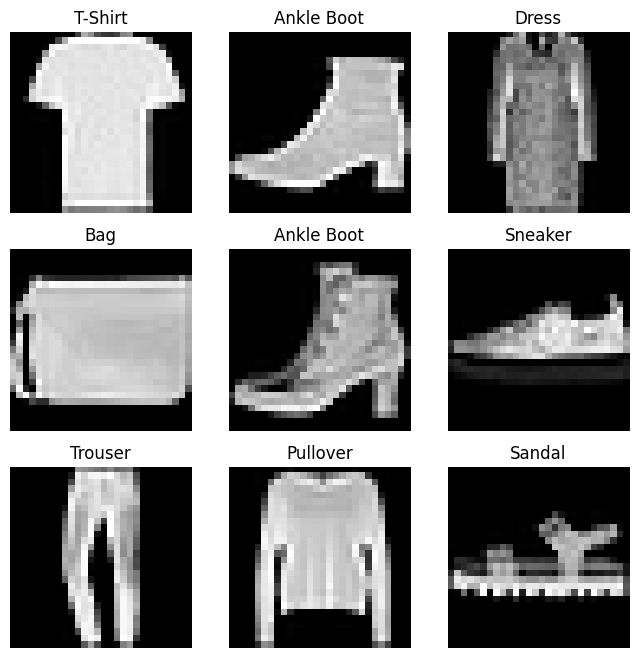

In [20]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis('off')
    plt.title(labels_map[label])
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [21]:
# Custom Dataset
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        # 주어진 인덱스 idx 에 해당하는 샘플을 데이터셋에서 불러오고 반환
        img_path = os.paht.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


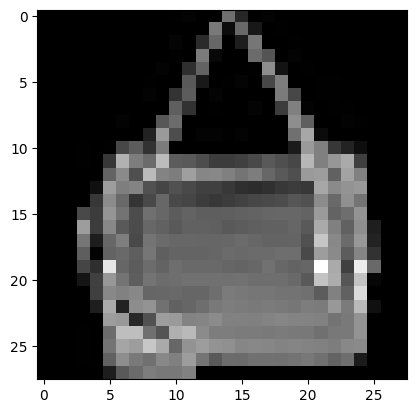

Label : 8


In [23]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {label}')

# 3. Model

In [27]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [28]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using {device} device')

Using cuda device


In [30]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [31]:
model = NeuralNet().to(device)
print(model)

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [35]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
print(logits.shape)
print(logits)

pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(pred_prob)
print(pred_prob.sum())
print(y_pred)

torch.Size([1, 10])
tensor([[-0.0469, -0.0131, -0.0114, -0.1175, -0.0263, -0.0043, -0.0094, -0.1054,
         -0.0247,  0.0211]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.0986, 0.1020, 0.1022, 0.0919, 0.1007, 0.1029, 0.1024, 0.0930, 0.1008,
         0.1056]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor(1., device='cuda:0', grad_fn=<SumBackward0>)
tensor([9], device='cuda:0')


In [42]:
input_image = torch.rand(3, 28, 28)
print(f'Original Size : {input_image.size()}')

flat_image = nn.Flatten()(input_image)
print(f'Flat size : {flat_image.size()}')

hidden1 = nn.Linear(in_features=28*28, out_features=28)(flat_image)
print(f'Hidden size : {hidden1.size()}')

print(f'Before Relu : {hidden1}\n\n')
hidden1 = nn.ReLU()(hidden1)
print(f'After Relu : {hidden1}')

Original Size : torch.Size([3, 28, 28])
Flat size : torch.Size([3, 784])
Hidden size : torch.Size([3, 28])
Before Relu : tensor([[ 0.0246, -0.1460, -0.2210,  0.3063, -0.2319,  0.2471, -0.3588, -0.0954,
         -0.3542,  0.3738, -0.5713,  0.0529, -0.1474,  0.3743, -0.1956,  0.3246,
          0.1769, -0.1446,  0.4939, -0.3623, -0.2797, -0.3320,  0.0404,  0.5574,
          0.2606,  0.3068,  0.0141,  0.2817],
        [ 0.3267, -0.1262, -0.1797,  0.1549, -0.1239,  0.3923, -0.0423, -0.0823,
         -0.2005,  0.4608, -0.4206,  0.1234,  0.0408,  0.1673, -0.1634,  0.7539,
          0.3954, -0.2185,  0.1165, -0.2312, -0.0386,  0.0400, -0.5248,  0.8528,
          0.5579,  0.5870,  0.2522,  0.1082],
        [-0.0268,  0.1368, -0.3295,  0.1746, -0.2793,  0.3464, -0.5298, -0.1751,
         -0.5250,  0.1332, -0.4482,  0.2472,  0.1984,  0.0747,  0.1049,  0.2801,
          0.6924, -0.1598,  0.1150, -0.0361, -0.2711, -0.3448, -0.5313,  0.9680,
          0.2371,  0.2468, -0.1087,  0.2984]], grad_fn=<Ad

In [45]:
for name, param in model.named_parameters():
    print(f'Layer : {name} | Size : {param.size()} | values : {param[:2]}\n')

Layer : linear_relu_stack.0.weight | Size : torch.Size([512, 784]) | values : tensor([[ 0.0094, -0.0276,  0.0130,  ..., -0.0263,  0.0070, -0.0331],
        [-0.0166,  0.0083,  0.0020,  ...,  0.0244,  0.0115, -0.0180]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer : linear_relu_stack.0.bias | Size : torch.Size([512]) | values : tensor([-0.0123,  0.0171], device='cuda:0', grad_fn=<SliceBackward0>)

Layer : linear_relu_stack.2.weight | Size : torch.Size([128, 512]) | values : tensor([[-0.0096, -0.0143, -0.0147,  ..., -0.0361, -0.0298,  0.0207],
        [ 0.0050, -0.0275, -0.0427,  ...,  0.0302,  0.0137, -0.0315]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer : linear_relu_stack.2.bias | Size : torch.Size([128]) | values : tensor([0.0305, 0.0063], device='cuda:0', grad_fn=<SliceBackward0>)

Layer : linear_relu_stack.4.weight | Size : torch.Size([10, 128]) | values : tensor([[-0.0237,  0.0354, -0.0048,  0.0139, -0.0834,  0.0671, -0.0275,  0.0732,
          0.0106, -0

# 4. Optimize

In [47]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [80]:
training_data = datasets.FashionMNIST(root='../../data/', 
                                      download=True,
                                      train=True,
                                      transform=ToTensor())

test_data = datasets.FashionMNIST(root='../../data/',
                                  download=True,
                                  train=False,
                                  transform=ToTensor())

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x

In [81]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = NeuralNet().to(device)
batch_size = 64
learning_rate = 1e-3
epochs = 10

In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [83]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch+1) * len(x)
            print(f'loss : {loss:>.7f}\t| {current:>5d}/{size:>5d}')

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1)==y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error : \n Accuracy : {100*correct:>0.1f}%\t | Avg Loss : {test_loss:>8f}\n')

In [84]:
for epoch in range(epochs):
    print(f'Epoch {epoch+1}\n------------------------------')
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
------------------------------
loss : 2.2977393	|    64/60000
loss : 2.3001947	|  6464/60000
loss : 2.3128366	| 12864/60000
loss : 2.3160841	| 19264/60000
loss : 2.3024893	| 25664/60000
loss : 2.3065763	| 32064/60000
loss : 2.2825572	| 38464/60000
loss : 2.2922947	| 44864/60000
loss : 2.2932279	| 51264/60000
loss : 2.2811742	| 57664/60000
Test Error : 
 Accuracy : 10.0%	 | Avg Loss : 2.294914

Epoch 2
------------------------------
loss : 2.2878039	|    64/60000
loss : 2.2900193	|  6464/60000
loss : 2.3003912	| 12864/60000
loss : 2.3065441	| 19264/60000
loss : 2.2881198	| 25664/60000
loss : 2.2955248	| 32064/60000
loss : 2.2726622	| 38464/60000
loss : 2.2811069	| 44864/60000
loss : 2.2816279	| 51264/60000
loss : 2.2726204	| 57664/60000
Test Error : 
 Accuracy : 15.0%	 | Avg Loss : 2.281559

Epoch 3
------------------------------
loss : 2.2764473	|    64/60000
loss : 2.2765284	|  6464/60000
loss : 2.2840359	| 12864/60000
loss : 2.2914610	| 19264/60000
loss : 2.2690473	| 25664/60

# 5. Save & Load

In [87]:
import torchvision.models as models

model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), './model/model_weights.pth')

In [88]:
model = models.vgg16()
model.load_state_dict(torch.load('./model/model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1